In [1]:
!git clone https://github.com/niazwazir/MEDICAL_IMAGE_SEGMENTATION.git

Cloning into 'MEDICAL_IMAGE_SEGMENTATION'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 91.20 KiB | 30.40 MiB/s, done.


IoU between ROIs: 0.2734
UOI between ROIs: 3.6580


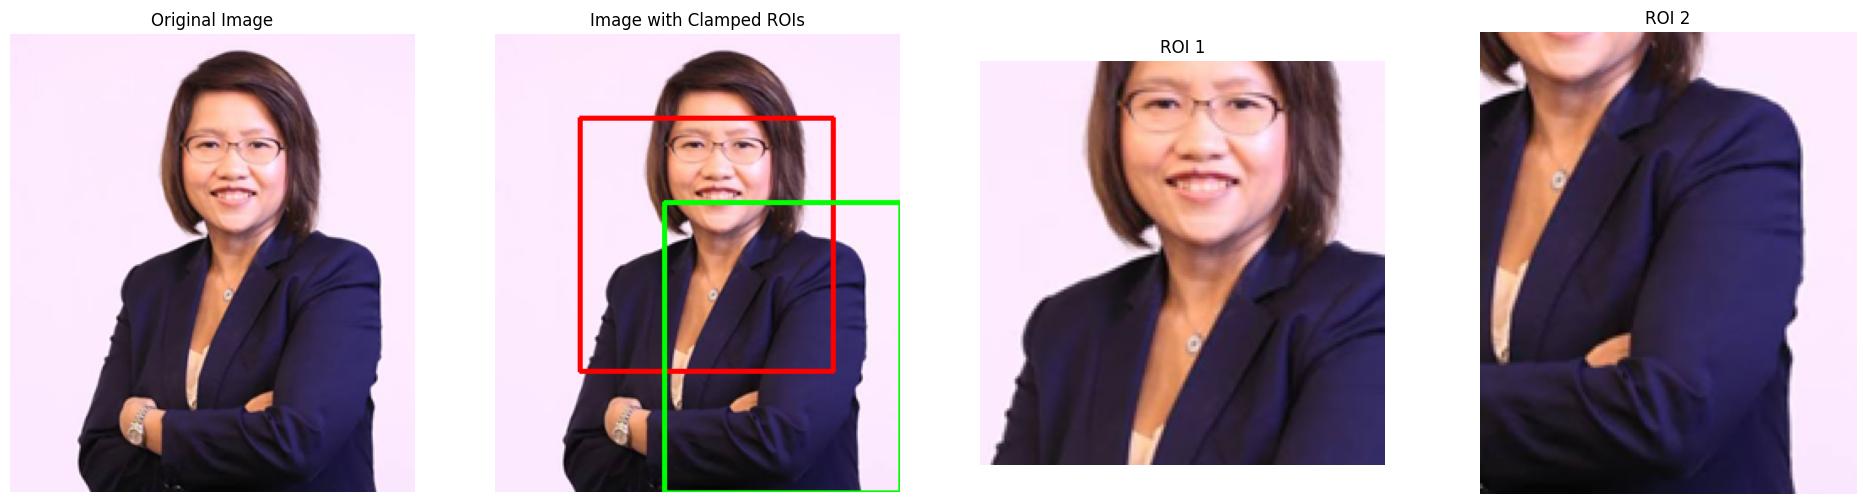

In [2]:
import cv2
import matplotlib.pyplot as plt

def clamp_roi(roi, img_width, img_height):
    """
    Clamp ROI coordinates (x, y, w, h) so that the ROI fits inside the image.
    """
    x, y, w, h = roi

    # Clamp x and y to be >= 0
    x = max(0, x)
    y = max(0, y)

    # Clamp width and height so ROI does not go outside image bounds
    if x + w > img_width:
        w = img_width - x
    if y + h > img_height:
        h = img_height - y

    # Ensure width and height are non-negative after clamping
    w = max(0, w)
    h = max(0, h)

    return (x, y, w, h)

def calculate_iou_uoi(boxA, boxB):
    """
    Calculate IoU and UOI between two bounding boxes (x, y, w, h).
    """
    xA1, yA1, wA, hA = boxA
    xA2, yA2 = xA1 + wA, yA1 + hA

    xB1, yB1, wB, hB = boxB
    xB2, yB2 = xB1 + wB, yB1 + hB

    # Intersection rectangle
    x_left = max(xA1, xB1)
    y_top = max(yA1, yB1)
    x_right = min(xA2, xB2)
    y_bottom = min(yA2, yB2)

    if x_right < x_left or y_bottom < y_top:
        intersection_area = 0
    else:
        intersection_area = (x_right - x_left) * (y_bottom - y_top)

    areaA = wA * hA
    areaB = wB * hB
    union_area = areaA + areaB - intersection_area

    iou = intersection_area / union_area if union_area > 0 else 0
    uoi = union_area / intersection_area if intersection_area > 0 else float('inf')

    return iou, uoi

def main():
    image_path = "MEDICAL_IMAGE_SEGMENTATION/ABC.png"  # Adjust path as needed

    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image not found at {image_path}")
        return

    img_height, img_width = image.shape[:2]

    # Define two ROIs (some deliberately out of bounds)
    roi1 = (50, 50, 150, 150)     # Inside image bounds
    roi2 = (100, 100, 500, 500)   # Possibly out of bounds (too large)

    # Clamp ROIs inside image boundaries
    roi1 = clamp_roi(roi1, img_width, img_height)
    roi2 = clamp_roi(roi2, img_width, img_height)

    # Convert BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Crop ROIs safely
    x1, y1, w1, h1 = roi1
    x2, y2, w2, h2 = roi2
    roi_img1 = image_rgb[y1:y1+h1, x1:x1+w1]
    roi_img2 = image_rgb[y2:y2+h2, x2:x2+w2]

    # Calculate IoU and UOI
    iou, uoi = calculate_iou_uoi(roi1, roi2)
    print(f"IoU between ROIs: {iou:.4f}")
    print(f"UOI between ROIs: {uoi:.4f}")

    # Draw rectangles on a copy of the image
    image_with_rois = image_rgb.copy()
    cv2.rectangle(image_with_rois, (x1, y1), (x1+w1, y1+h1), (255, 0, 0), 2)  # Blue box
    cv2.rectangle(image_with_rois, (x2, y2), (x2+w2, y2+h2), (0, 255, 0), 2)  # Green box

    # Display original image, image with ROIs, and cropped ROIs
    fig, axs = plt.subplots(1, 4, figsize=(24, 6))

    axs[0].imshow(image_rgb)
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    axs[1].imshow(image_with_rois)
    axs[1].set_title("Image with Clamped ROIs")
    axs[1].axis('off')

    axs[2].imshow(roi_img1)
    axs[2].set_title("ROI 1")
    axs[2].axis('off')

    axs[3].imshow(roi_img2)
    axs[3].set_title("ROI 2")
    axs[3].axis('off')

    plt.show()

if __name__ == "__main__":
    main()
